In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

In [42]:
df=pd.read_csv('diabetes2.csv')

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

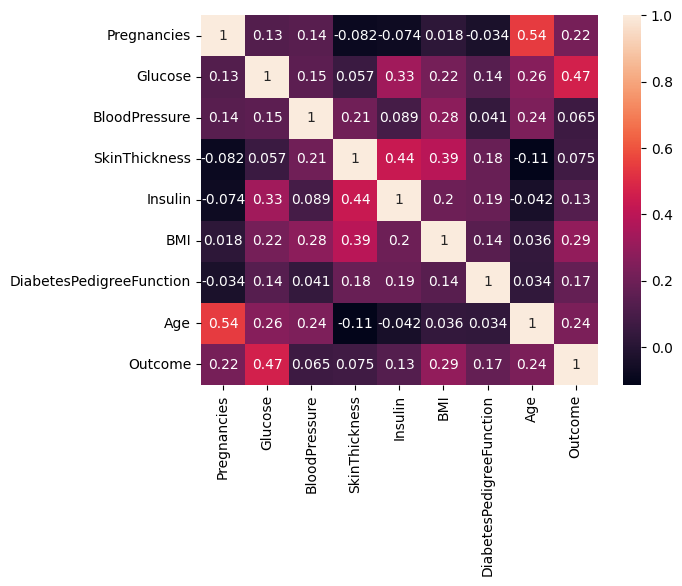

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
accuracy_scores=[]

for k in range(1,30):
    if k//2!=0:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        acc=accuracy_score(y_test,y_pred)
        accuracy_scores.append(acc)
    else:
        continue

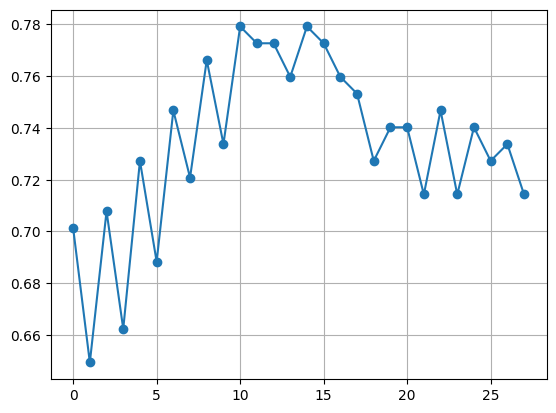

In [49]:
plt.plot(accuracy_scores,marker='o')
plt.grid(True)

In [50]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
print(y_pred)

acc=accuracy_score(y_test,y_pred)
print(f"accuracy:{acc}")

[0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]
accuracy:0.7597402597402597


<Axes: >

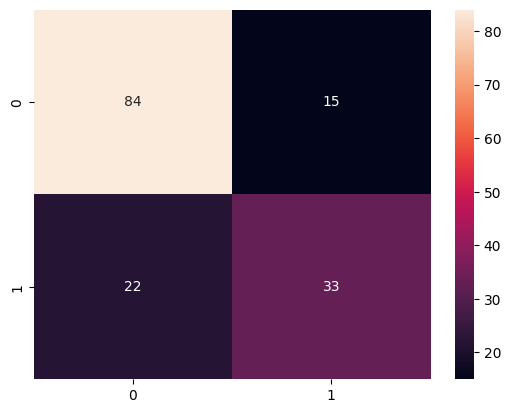

In [51]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

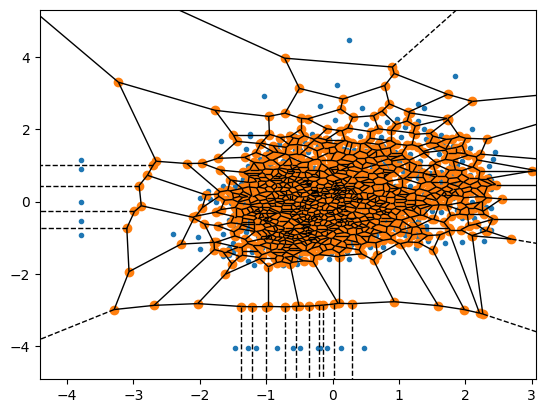

In [52]:
points=df[['Glucose','BMI']]

scaler=StandardScaler()
points=scaler.fit_transform(points)

vor = Voronoi(points)

fig = voronoi_plot_2d(vor)
